# Métodos sem malha

## Dependências

In [1]:
%matplotlib notebook

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

## Gaussiana com raio
$$
w = 
\begin{cases}
\dfrac{{e^{-({\frac{|d|}c})^2}} - {e^{-({\frac r c})^2}}}{1-{e^{-({\frac{r}c})^2}}}, d<r
\\
0, d > r
\end{cases}
$$

In [2]:
def gaussian_with_radius(dist,r):
    c=100
    if la.norm(dist) <= r:
        exp1 = np.exp(-(la.norm(dist)/c)**2)
        exp2 = np.exp(-(r/c)**2)
        weight = ( exp1 - exp2 )/(1-exp2)
    else:
        weight = 0
    return weight

## Pesos $W$

In [3]:
def W(data,point,r):
    W=[]
    for index,row in enumerate(data):
        d2d = row[0:2]
        leftZeroes = np.zeros([1,index])
        rightZeroes = np.zeros([1,len(data) - index - 1])
        weight = gaussian_with_radius(np.subtract(d2d,point),r)
        newRow = np.concatenate([leftZeroes,[[weight]],rightZeroes],axis=1)[0]
        W.append(newRow)
    return W

## Matriz de Base $P$

In [4]:
def create_base(base,data):
    P=[]
    for dat in data:
        row = []
        for b in base:
            exec("x=%s"%dat[0])
            exec("y=%s"%dat[1])
            row.append(eval(b))
        P.append(row)
    return P

## Dados

In [5]:
data = [
    [2, 1, -0.832294],
    [4, 1, -2.614574],
    [6, 1, 5.761022],
    [8, 1, -1.164000],
    [10, 1, -8.390715],
    [12, 1, 10.1262],
    [14, 1, 1.914321],
    [16, 1, -15.325516]
];

base = ["1","x","x**2"];



## Coeficientes $\phi$

In [6]:
class LittleDet(Exception):
    def __init__(self, m):
        self.message = m
    def __str__(self):
        return self.message

def coefficients(data,P, x,r):
    B = np.matmul(np.transpose(P),W(data,x,r))
    A = np.matmul(B,P)
    det = la.det(A)
    if(abs(det) < 1e-6):
        raise LittleDet("determinante muito pequeno!")
    else:
        Bd=np.matmul(B,[z for x,y,z  in data])
    return np.matmul(la.inv(A),Bd)
        


## Raio mínimo $R$
parâmetros:
 - `data`: conjunto de dados
 - `points`: pontos de referência
 - `m`: quantidade de pontos no suporte

In [7]:
def get_radius(data,point,m):
    distances = []
    for dat in data:
        dif = np.subtract(point,dat[0:2])
        dist = la.norm(dif)
        distances.append(dist)
    distances = sorted(distances);
    return distances[m]

## Função de aproximação $ũ$

In [8]:
def approx(data,base,point):
    m = len(base);
    while True:
        try:
            r = get_radius(data,point,m)
            P = create_base(base,data)
            c  = coefficients(data,P,point,r)
            p = create_base(base,[point])
            break;
        except LittleDet:
            m+=1;
    return np.matmul(p,c);


## Execução

<IPython.core.display.Javascript object>


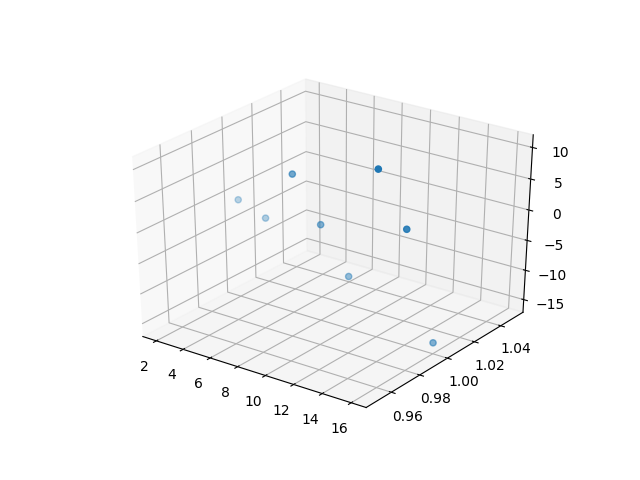

<IPython.core.display.Javascript object>


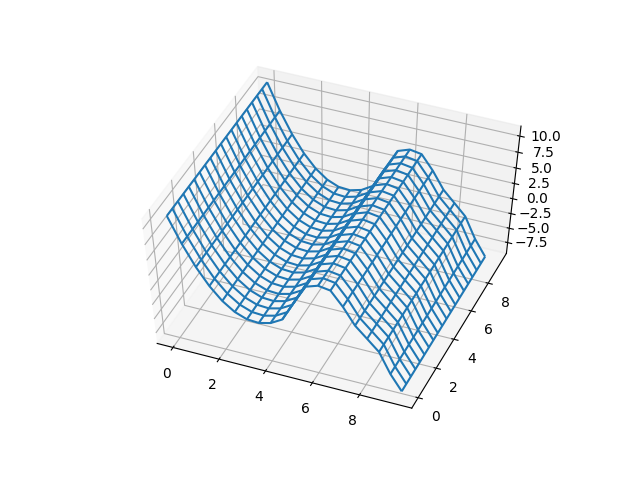

In [32]:
xs = [x for x,y,z in data]
ys = [y for x,y,z in data]
zs = [z for x,y,z in data]

fig = plt.figure("dados")

data_plot = fig.add_subplot(111, projection='3d')
data_plot.scatter(xs,ys,zs)


fig = plt.figure("aproximação")
xs = np.arange(0,10,0.5)
ys = np.arange(0,10,0.5)
X, Y = np.meshgrid(xs, ys)

zs = np.array([ approx(data,base,[x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z=zs.reshape(X.shape)


mesh_plot = fig.add_subplot(111, projection='3d')
mesh_plot.plot_wireframe(X,Y,Z)